
<b>About the notebook<\b>
EDA's notebook for(Weather classification)

<b>Imporing libraries<b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

<b>CSV

In [ ]:
# Replace with the actual raw content url
raw_csv_url='https://raw.githubusercontent.com/Shadin-Almubark/Weather-classification/main/weather_classification_data.csv'
# Read the CSV file into a DataFrame
weather_data = pd.read_csv(raw_csv_url)

# Display the first few rows
weather_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


<b>EDA -info

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
weather_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
weather_data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
weather_data.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [ ]:
weather_data.describe(include=['object','category'])

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


<b>Encodeing

In [ ]:
#Encoding

label_encoders = {}
encoded_data = pd.DataFrame()


for column in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le

encoded_data.head()

,Cloud Cover,Season,Location,Weather Type
0,3,3,1,1
1,3,1,1,0
2,0,1,2,3
3,0,1,0,3
4,2,3,2,1


In [ ]:
en_weather = pd.concat([weather_data, encoded_data], axis=1)
en_weather = en_weather.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis=1)

en_weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


<b>Data visualization

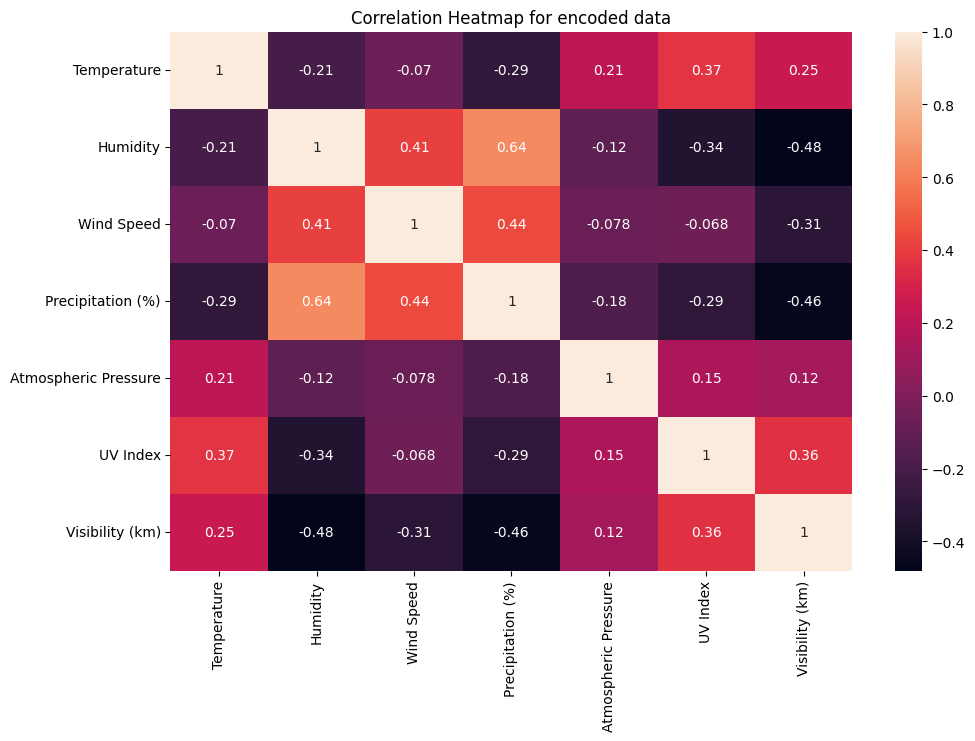

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(en_weather.corr(), annot=True)
plt.title('Correlation Heatmap for encoded data')
plt.show()

Text(0, 0.5, 'Count')

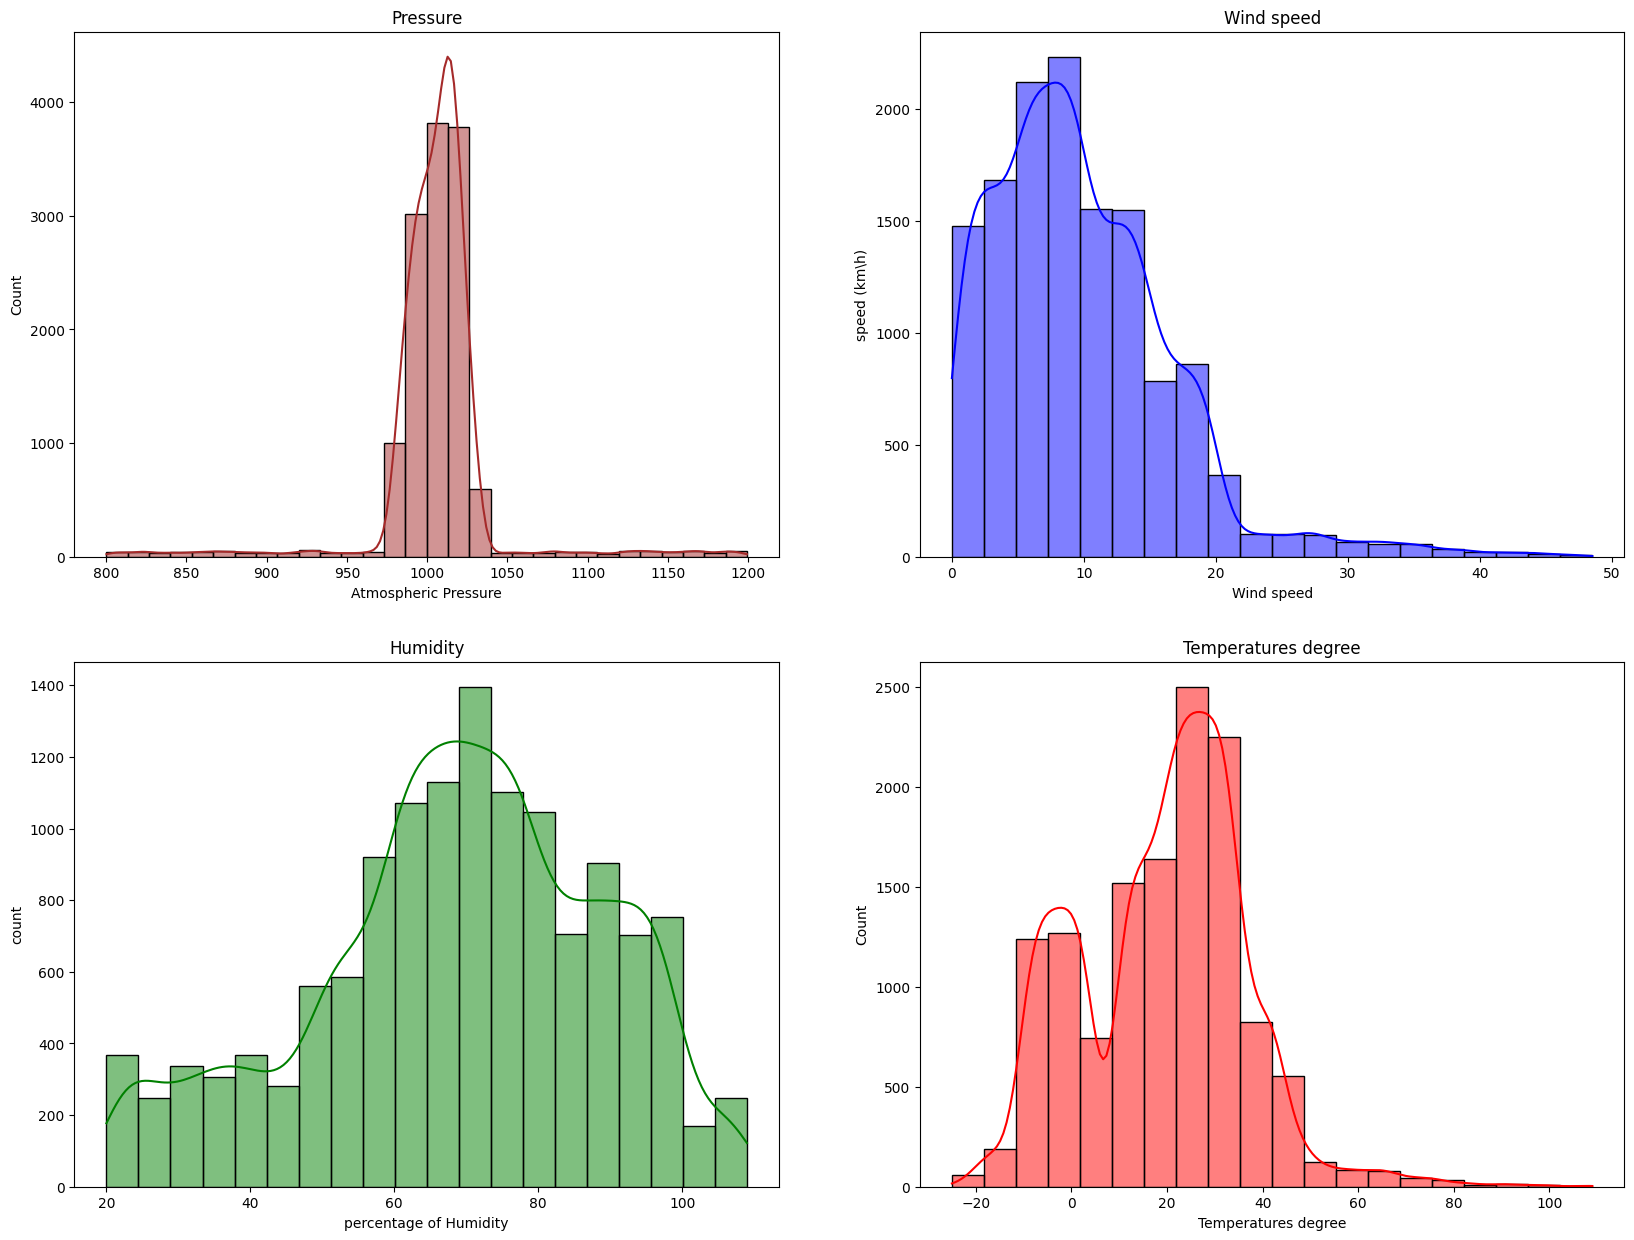

In [ ]:
#SUBPLOTS

#Atmospheric Pressure
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(weather_data['Atmospheric Pressure'], bins=30, kde=True, color='brown')
plt.title('Pressure')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Count')

#Wind Speed
plt.subplot(2, 2, 2)
sns.histplot(weather_data['Wind Speed'], bins=20, kde=True, color='blue')
plt.title('Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('speed (km\h)')

#Humidity
plt.subplot(2, 2, 3)
sns.histplot(weather_data['Humidity'], bins=20, kde=True, color='green')
plt.title('Humidity')
plt.xlabel('percentage of Humidity')
plt.ylabel('count')

#Temperature
plt.subplot(2, 2, 4)
sns.histplot(weather_data['Temperature'], bins=20, kde=True, color='red')
plt.title('Temperatures degree')
plt.xlabel('Temperatures degree')
plt.ylabel('Count')

Text(0.5, 1.0, 'Weather Type')

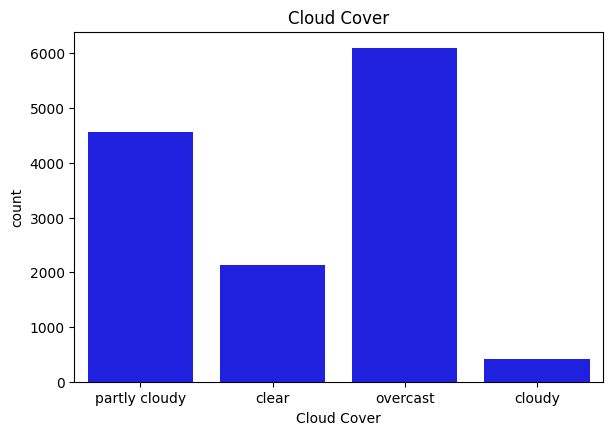

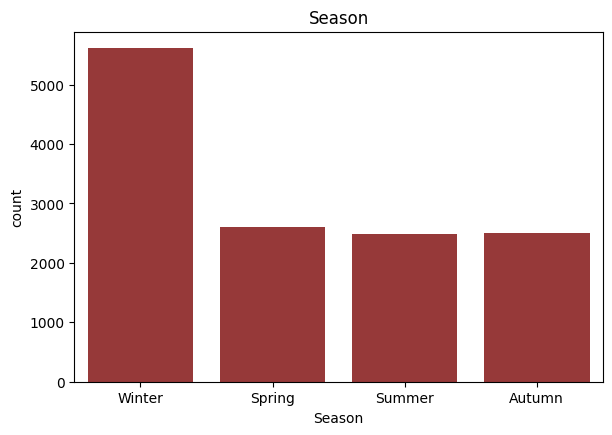

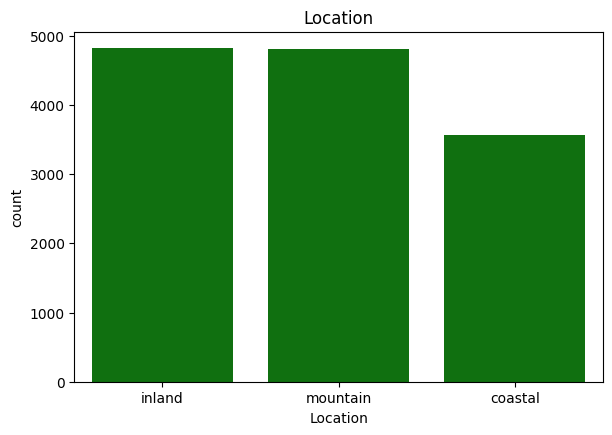

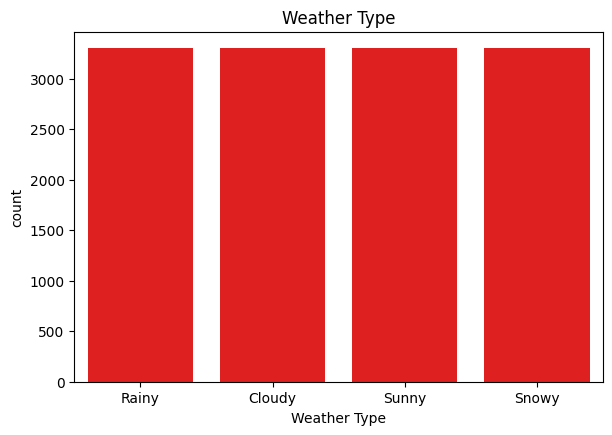

In [ ]:
#plots of object

#cloud cover
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Cloud Cover', data=weather_data, color="blue")
plt.title('Cloud Cover')

#seasons
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.countplot(x="Season" , data=weather_data , color="brown")
plt.title('Season')

#Location
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.countplot(x="Location" ,data=weather_data ,color="green")
plt.title("Location")

#weather type
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.countplot(x="Weather Type" , data=weather_data ,color="red")
plt.title('Weather Type')

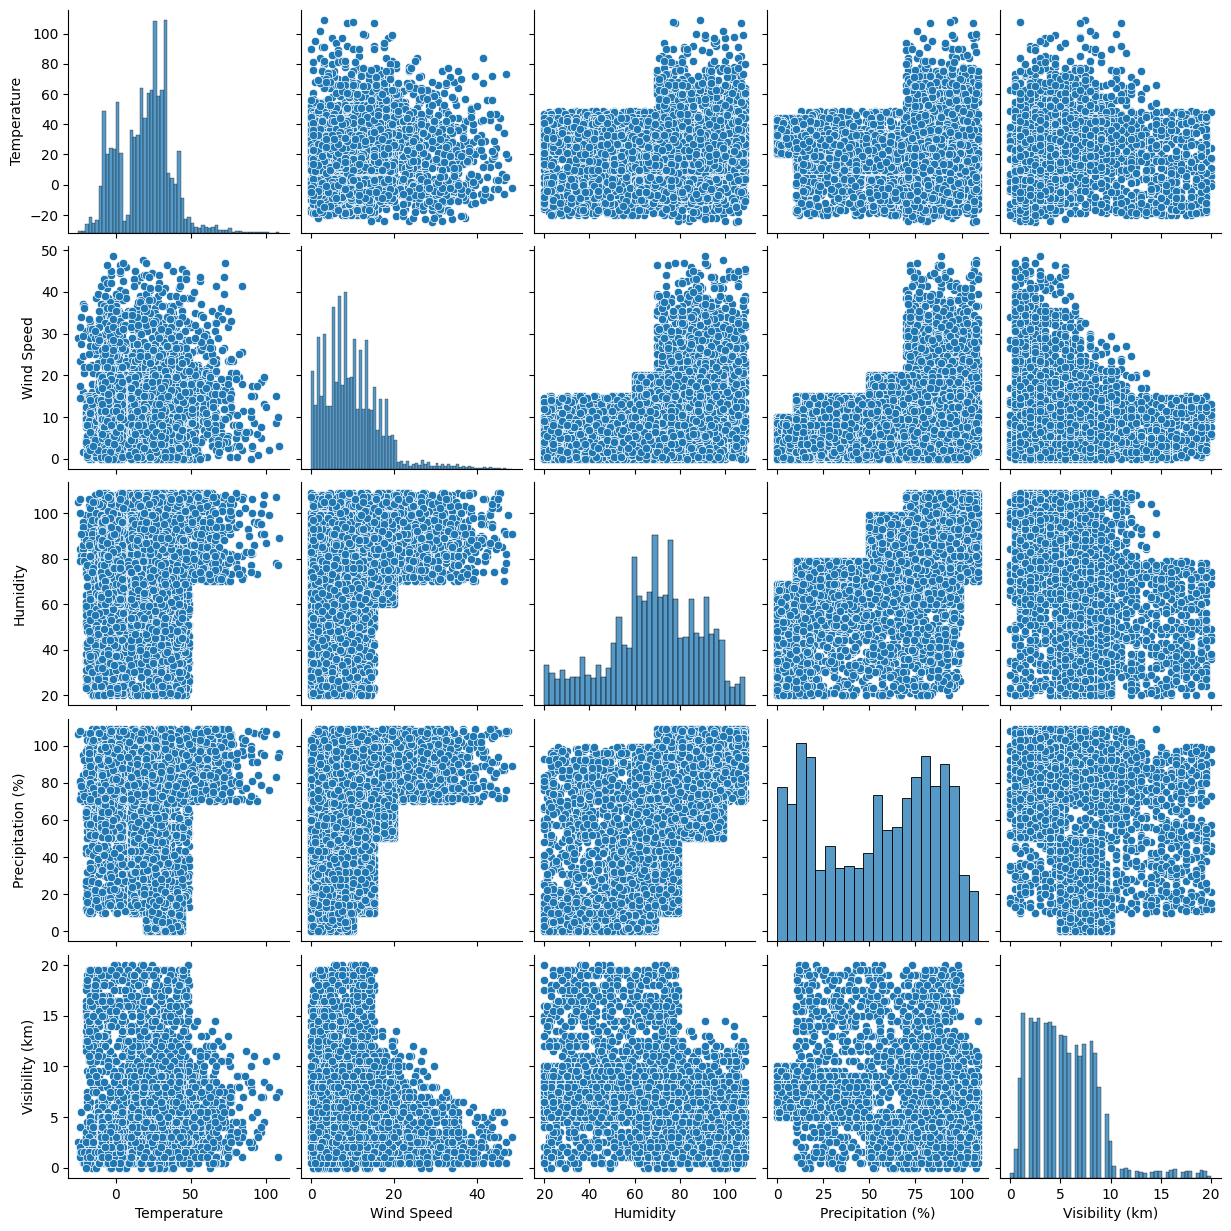

In [ ]:
sns.pairplot(en_weather[['Temperature', 'Wind Speed' ,'Humidity','Precipitation (%)','Visibility (km)' ]])
plt.show()

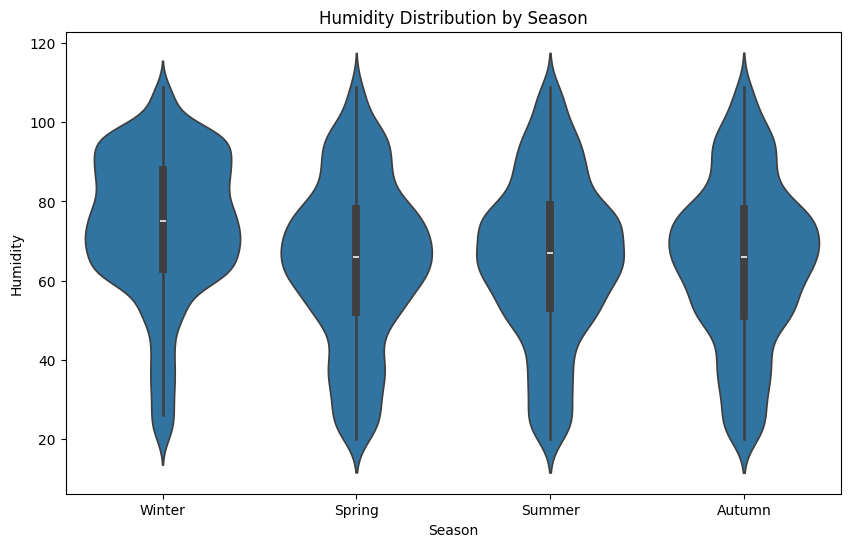

In [ ]:
#Humidity Distribution by Season

plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='Humidity', data=weather_data, )
plt.title('Humidity Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Humidity')
plt.show()

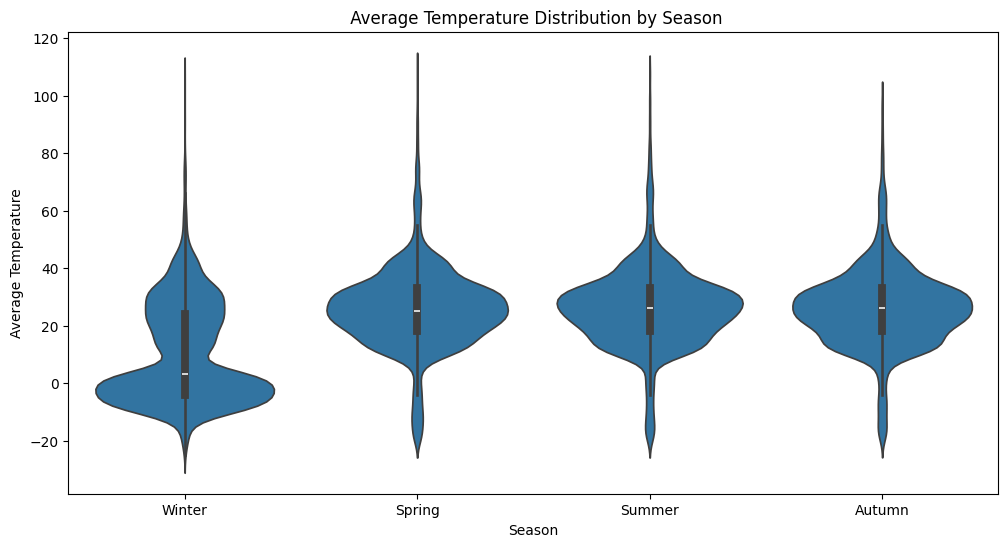

In [ ]:
#Average Temperature Distribution by

plt.figure(figsize=(12, 6))
sns.violinplot(x=weather_data['Season'], y=weather_data['Temperature'])
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.title(' Average Temperature Distribution by Season')
plt.show()

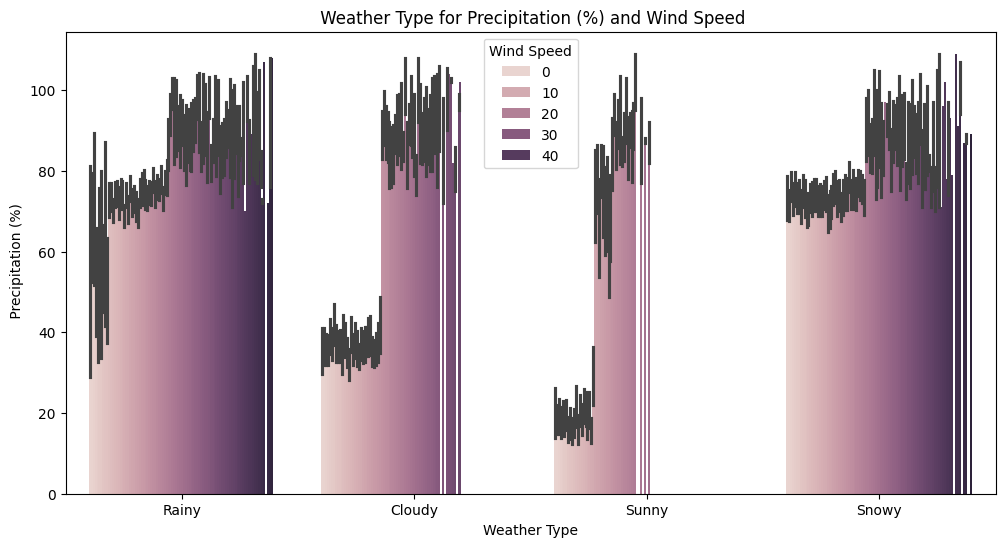

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x=weather_data['Weather Type'],  y=weather_data['Precipitation (%)'], hue=weather_data['Wind Speed'])
plt.xlabel('Weather Type')
plt.ylabel(' Precipitation (%)')
plt.title(' Weather Type for Precipitation (%) and Wind Speed')
plt.legend(title='Wind Speed')
plt.show()

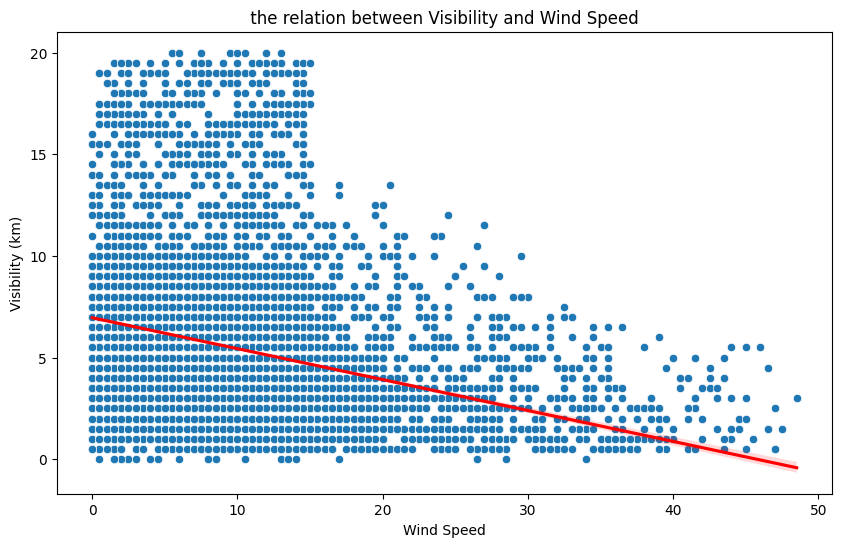

In [ ]:
#Correlation between Wind Speed & Visbility

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Speed', y='Visibility (km)', data=weather_data)
sns.regplot(x='Wind Speed', y='Visibility (km)', data=weather_data, scatter=False, color='r')
plt.title(' the relation between Visibility and Wind Speed ')
plt.xlabel('Wind Speed')
plt.ylabel('Visibility (km)')
plt.show()

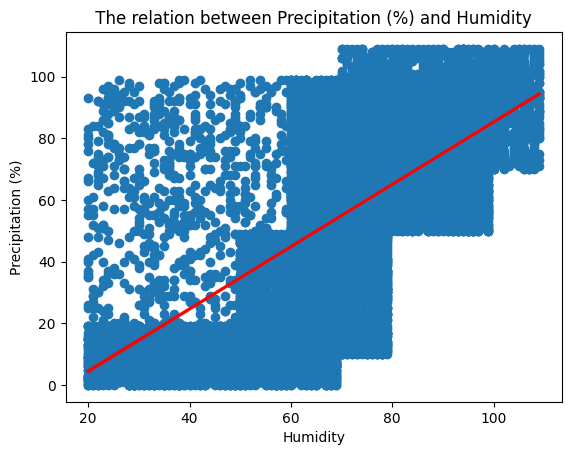

In [ ]:

# The relation between Precipitation (%) and Humidity

plt.scatter(weather_data['Humidity'], weather_data['Precipitation (%)'])
sns.regplot(x='Humidity', y='Precipitation (%)', data=weather_data, scatter=False, color='r')
plt.title(' The relation between Precipitation (%) and Humidity ')
plt.xlabel('Humidity')
plt.ylabel('Precipitation (%)')
plt.show()

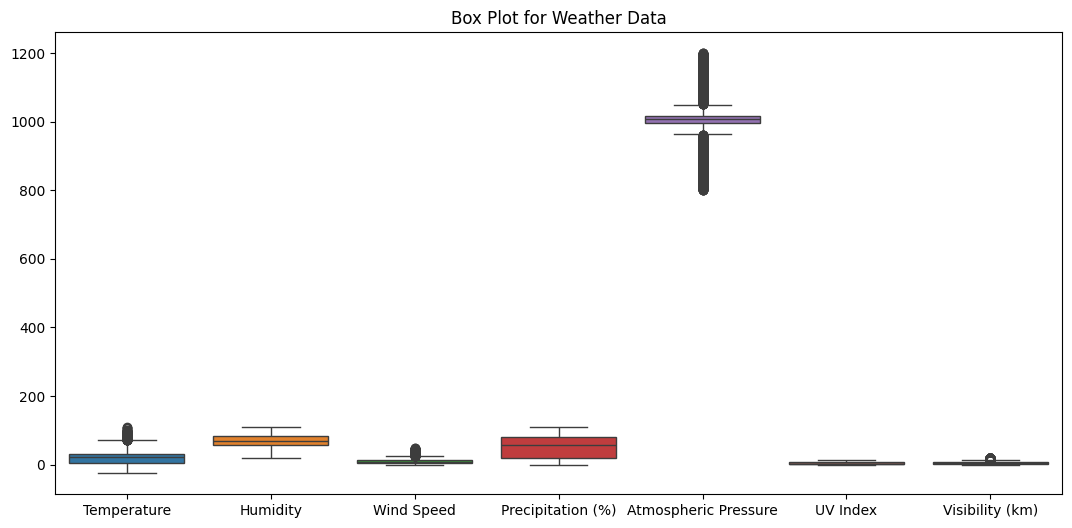

In [ ]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=weather_data)
plt.title('Box Plot for Weather Data')
plt.show()